## Smoothing

###### hyperparameter

###### exponential smoothing(지수 평활): 최근 데이터를 더 중요하게 간주 - 가까울 수록 더 높은 가중치
###### 알파 값이 작을수록, 더 큰 평활 효과: 최신 트렌드 반영-큰 알파값, 전체평균과비슷하게-작은 알파값

#### DataFrame.ewm().mean() in Pandas

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
air = pd.read_csv('Airpassengers.csv', parse_dates = True, header = None)

In [30]:
air.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [31]:
air.columns = ['Date', 'Passengers']

In [32]:
air.columns

Index(['Date', 'Passengers'], dtype='object')

In [33]:
#air['Smooth.1'] = np.nan
#air['Smooth.5'] = np.nan
#air['Smooth.9'] = np.nan

In [34]:
#air['Smooth.1']

In [35]:
air = air.reindex(columns = list(air.columns)+['Smooth.1', 'Smooth.5', 'Smooth.9'], fill_value=0)

In [36]:
air.head()

,Date,Passengers,Smooth.1,Smooth.5,Smooth.9
0,1949-01,112,0,0,0
1,1949-02,118,0,0,0
2,1949-03,132,0,0,0
3,1949-04,129,0,0,0
4,1949-05,121,0,0,0


### Exponential Smoothing

##### shortage: not perform well in the case of data with a long-term trend, seasonality.

In [37]:
air['Smooth.5']=air.ewm(alpha=.5).mean().Passengers
air['Smooth.9']=air.ewm(alpha=.9).mean().Passengers
air['Smooth.1']=air.ewm(alpha=.1).mean().Passengers

In [38]:
air.head()

,Date,Passengers,Smooth.1,Smooth.5,Smooth.9
0,1949-01,112,112.000000,112.000000,112.000000
1,1949-02,118,115.157895,116.000000,117.454545
2,1949-03,132,121.372694,125.142857,130.558559
3,1949-04,129,123.590579,127.200000,129.155716
4,1949-05,121,122.957974,124.000000,121.815498


In [39]:
air.Passengers.mean()

280.2986111111111

In [40]:
 air['Smooth.1'].mean()

259.50142242182733

In [41]:
 air['Smooth.5'].mean()

278.05830836842404

In [42]:
 air['Smooth.9'].mean()

280.0548669929151

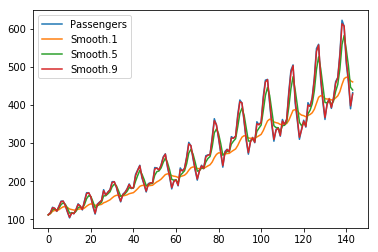

In [43]:
air.plot()

In [47]:
plt.show()

### Holt's Method & Holt-Winter smoothing
##### :data with trend and seasonality
### Karman Filter
### LOESS (Locally Estimated Scatter Plot Smoothing)